In [1]:
import xarray
import rioxarray
import numpy as np

In [13]:
for year in range(1995, 2012 + 1):
    #
    dat = xarray.open_mfdataset(f"/pfs/work7/workspace/scratch/tu_zxobe27-ds_project/data/cloud_cover/N_{year}*.nc")
    #
    dat_agg = dat.CF.resample(time = "1Y").mean(dim = "time")
    #
    dat_agg.to_netcdf(f"/pfs/work7/workspace/scratch/tu_zxobe27-ds_project/data/cloud_cover_tmp/N_{year}_agg.nc")

In [2]:
dat = xarray.open_mfdataset(f"/pfs/work7/workspace/scratch/tu_zxobe27-ds_project/data/cloud_cover_tmp/*.nc")

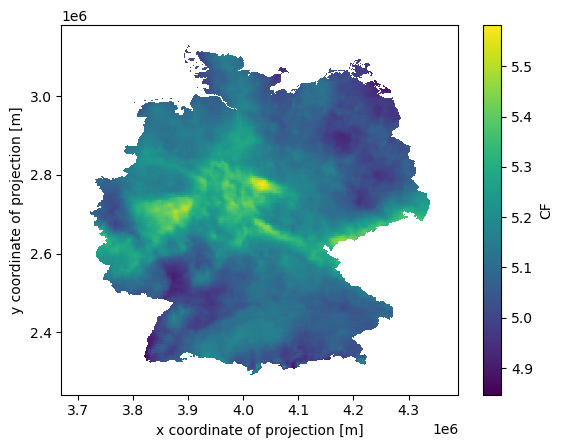

In [8]:
dat.CF.mean(dim = "time").plot()

In [15]:
class dotdict(dict):
    """dot.notation access to dictionary attributes"""
    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__
self = dotdict({"storage_directory": "/pfs/work7/workspace/scratch/tu_zxobe27-ds_project/data/SARAH"})

In [17]:
from urllib.request import urlretrieve
from zipfile import ZipFile
print("Downloading...")
urlretrieve("http://re.jrc.ec.europa.eu/pvg_download/sarahdata/gh_0_year_sarah.zip",
    self.storage_directory + "/raw/gh_0_year_sarah.zip")

print("Extracting...")
with ZipFile(self.storage_directory + "/raw/gh_0_year_sarah.zip", "r") as zip_ref:
    zip_ref.extractall(self.storage_directory + "/raw")

Downloading...
Extracting...


In [45]:
dat = rioxarray.open_rasterio("/pfs/work7/workspace/scratch/tu_zxobe27-ds_project/data/SARAH/raw/gh_0_year.asc")
dat.rio.write_nodata(-1, inplace=True)
dat = dat.rio.set_crs("EPSG:4326")
dat = dat.rio.reproject("EPSG:25833")

In [48]:
dat.to_netcdf("/pfs/work7/workspace/scratch/tu_zxobe27-ds_project/data/SARAH/processed" + "/gh_0_year.nc")

In [39]:
import geopandas as gpd
borders = gpd.read_file("/pfs/work7/workspace/scratch/tu_zxobe27-ds_project/data/borders/gadm41_DEU_1.json")
brandenburg = borders[borders.NAME_1 == "Brandenburg"]

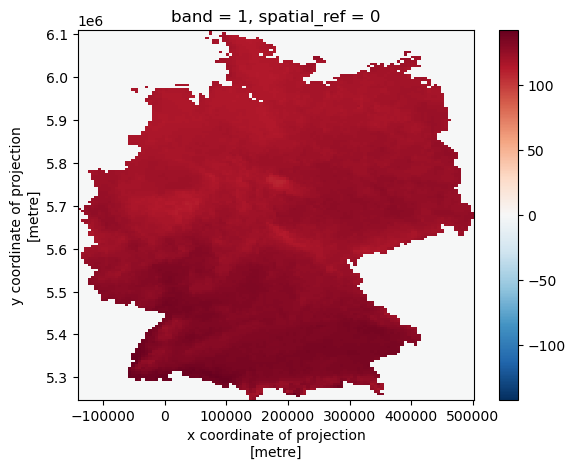

In [47]:
dat.rio.clip(borders.geometry).plot()

In [27]:
dat

<xarray.DataArray (band: 1, y: 7196, x: 4783)>
array([[[-1.000e+00, -1.000e+00, -1.000e+00, ..., -1.000e+00,
         -1.000e+00, -1.000e+00],
        [-1.000e+00, -1.000e+00, -1.000e+00, ..., -1.000e+00,
         -1.000e+00, -1.000e+00],
        [-1.000e+00, -1.000e+00, -1.000e+00, ..., -1.000e+00,
         -1.000e+00, -1.000e+00],
        ...,
        [-1.000e+00, -1.000e+00, -1.000e+00, ..., -9.999e+03,
         -9.999e+03, -9.999e+03],
        [-1.000e+00, -1.000e+00, -1.000e+00, ..., -9.999e+03,
         -9.999e+03, -9.999e+03],
        [-1.000e+00, -1.000e+00, -1.000e+00, ..., -9.999e+03,
         -9.999e+03, -9.999e+03]]], dtype=float32)
Coordinates:
  * x            (x) float64 -1.541e+07 -1.54e+07 ... 1.069e+07 1.07e+07
  * y            (y) float64 1.999e+07 1.999e+07 ... -1.927e+07 -1.928e+07
  * band         (band) int64 1
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    _FillValue:    -1.0

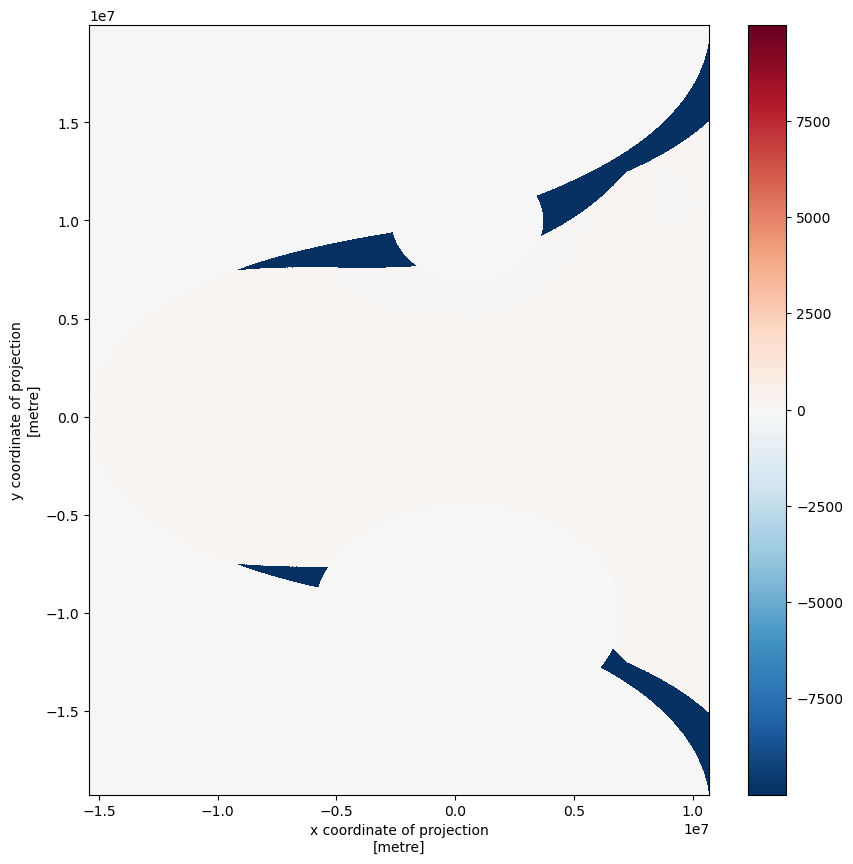

In [28]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10, 10))
xarray.plot.imshow(dat.squeeze("band", drop = True).drop("spatial_ref"))
#ax.set_xlim([-210000, -209050])
#ax.set_ylim([5300000, 5300050])

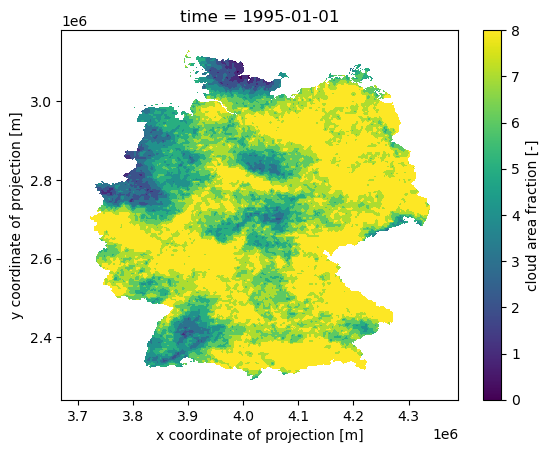

In [19]:
dat.where(dat.time == np.unique(dat.time)[0], drop = True).CF.plot()

In [3]:
dat_agg = dat.CF.resample(time = "1Y").mean(dim = "time")

In [9]:
dat_agg.to_netcdf(f"/pfs/work7/workspace/scratch/tu_zxobe27-ds_project/data/cloud_cover_tmp/N_2012_agg.nc")

In [ ]:
xarray.plot.imshow(dat.squeeze("band", drop = True))